In [1]:
from recast.CPT import CPT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Croatian site 

In [2]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7

points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])

layout.add_measurement_instances(points = points, points_type = 'misc')
layout.generate_mesh()
layout.optimize_measurements()

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'misc' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing misc measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


In [3]:
layout.generate_combined_layer(points_type = 'misc')

Generating combined layer for misc measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


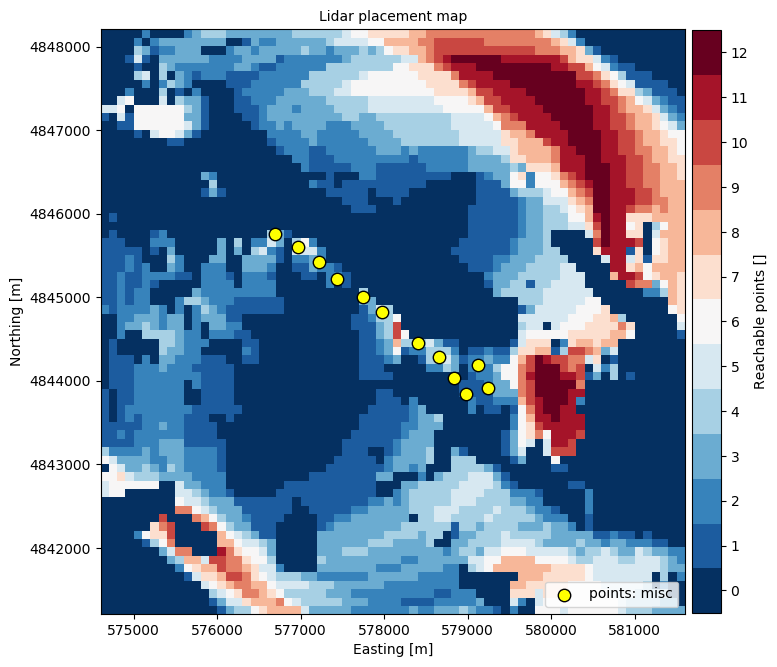

In [4]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [5]:
layout.add_lidar_instance(position = np.array([580600 + 350,4845700 + 200,100]), lidar_id = 'koshava')
layout.add_lidar_instance(position = np.array([580800 - 1800,4845300 + 2500, 271]), lidar_id = 'whittle')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 - 2000,100]), lidar_id = 'sirocco')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 + 2000,100]), lidar_id = 'sterenn')

layout.update_lidar_instance(lidar_id = 'koshava')
layout.update_lidar_instance(lidar_id = 'whittle')

Lidar 'koshava' added to the lidar dictionary!
Lidar dictionary contains 1 lidar instance(s).
Lidar 'whittle' added to the lidar dictionary!
Lidar dictionary contains 2 lidar instance(s).
Lidar 'sirocco' added to the lidar dictionary!
Lidar dictionary contains 3 lidar instance(s).
Lidar 'sterenn' added to the lidar dictionary!
Lidar dictionary contains 4 lidar instance(s).
Updating lidar instance: 'koshava'
Updating lidar instance: 'whittle'


In [6]:
layout.lidar_dictionary['koshava']['reachable_points']

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [7]:
layout.lidar_dictionary['whittle']['reachable_points']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:

layout.find_common_reachable_points(points_type = 'misc', lidar_ids = ['whittle', 'koshava'])

Measurement points 'reachable' added to the measurements dictionary!
Measurements dictionary contains 3 different measurement type(s).
Updating lidar instance: 'whittle'
Updating lidar instance: 'koshava'


In [ ]:
layout.measurements_dictionary['reachable']

In [17]:
layout.lidar_dictionary['whittle']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,1->2,216.93,4.47,479.0
1,2->3,211.17,4.53,481.0
2,3->4,204.06,4.76,534.0
3,4->5,198.91,5.20,455.0
4,5->6,190.15,4.40,592.0
5,6->7,185.56,4.20,429.0
6,7->1,222.66,4.73,1243.0


In [16]:
layout.lidar_dictionary['koshava']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,1->2,262.75,6.11,339.0
1,2->3,259.02,6.54,387.0
2,3->4,254.37,7.31,432.0
3,4->5,250.01,8.24,418.0
4,5->6,240.36,8.40,622.0
5,6->7,234.86,8.72,469.0
6,7->1,265.62,5.99,1116.0


layout.tsp(points_type = 'misc', lidar_ids = ['sirocco'])

In [ ]:
layout.optimize_trajectory(points_type = 'misc', lidar_ids = ['sirocco', 'sterenn'])

In [ ]:
layout.lidar_dictionary['sirocco']

In [ ]:
layout.measurements_selector

In [ ]:
layout.update_lidar_dictionary(use_optimized_trajectory = True)

In [ ]:
layout.lidar_dictionary['sirocco']

In [ ]:
min_traj_ind = np.where(layout.temp == np.min(layout.temp))

In [ ]:
min_traj_ind[0][0]

In [ ]:
np.sum(layout.lidar_dictionary['whittle']['motion_config'].values[:,-1])

In [ ]:
layout.lidar_dictionary['whittle']['motion_config'].loc[:, 'Move time [ms]'].values

In [ ]:
print(str(list(layout.lidar_dictionary.keys())))

In [ ]:
set(['sirocco', 'miss']).issubset(layout.lidar_dictionary)

In [ ]:
layout.lidar_dictionary['koshava']

In [ ]:
layout.lidar_dictionary['koshava']['motion_config']

In [ ]:
for lidar in layout.lidar_dictionary:
    print(lidar)

In [ ]:
def method(**kwargs):
    kwargs.update({'lidar_id' : 'koshava'})
    print(kwargs)


method()

In [ ]:
temp_dic = {'lidar_id': 'koshava'}

In [ ]:
temp_dic['lidar_id']